### Please install the required Python modules/SDKs

In [ ]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

### This demo uses the latest pillow package to show the rectangular bounding box around the face, so please upgrade the pillow package using the command below:

In [ ]:
!pip install Pillow==8.4

## Importing Useful Python Libraries or Packages 

In [2]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

### Documentation
- https://docs.microsoft.com/en-us/azure/azure-video-analyzer/video-analyzer-for-media-docs/video-indexer-use-apis

### Set up the Video Analyzer Portal Login:
- https://www.videoindexer.ai/account
- https://www.videoindexer.ai/media/library  - All uploaded video

### Get API Subscription:
https://api-portal.videoindexer.ai/

### Article
- https://medium.com/microsoftazure/visual-brand-detection-with-azure-video-indexer-cd65330b908c

In [113]:
CONFIG = {
    'SUBSCRIPTION_KEY': '3741ad7ece4b49278b1172f10999f4ba',
    'LOCATION': 'trial',
    'ACCOUNT_ID': 'd533515e-bada-4785-949a-c61c3abfd2bb'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

### Location Parameter
 - For paid service, please use service region i.e. westus2, eastus, etc.
 - For trial or free service, just use "trial" as I have used above. 

In [114]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiIxNGU0M2M5NDFlOWI0OTg1OWU0NDkzNDFhZjgxZjNiNiIsIkFjY291bnRJZCI6ImQ1MzM1MTVlLWJhZGEtNDc4NS05NDlhLWM2MWMzYWJmZDJiYiIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IkU1QzJCQTNGQTg3ODQ4RDRCMEEwODMwQTVEM0RGQkJBIiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY4NjYwOTkwNCwiZXhwIjoxNjg2NjEzODA0LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.MCUfE5xJE-tB-RYneOGo1Yk9-JuGZlHKfp2_zFSQB7Vbkf2RlGD-DfvYtWlar54CYyD5bvqym487YdlM3KwWng42lhGGMJX7Hy1Ujw66dtq9V1ywnRE7sS1EZUbp0Ki8iJzbQXw0KH615he5xPNjhzpMD9DJS0b8z2Nvp3syvh5GipvjsUkCrPZfVEyyQfyWeuv_Ls_c2gcdNao6eMV501ebTq_M_JQkKtAxxF0JBEmjNIWcfnrd3mdFHoQCb3o2FJcT5P_6BTD-AB0v4SzEkNlpZ5RokeXUvzCA1bb84rVuFE2QZ1zzOeak8pKKsjtYy6KbkiTJ_pYbUjowOBIPYQ


## Note: Please upload a video to Azure Video Indexer/Analyzer service and use its ID below instead of the given one 

### To get video ID, check on the video in the Library and you will get the video ID, appended to the URL. An example is shown here:
* Video URL:
https://www.videoindexer.ai/accounts/d1629197-588b-40a7-98fa-e19785ca082e/videos/2240904ed2
* Video ID: 2240904ed2
* If you don't have a video at this point, you can download this video and upload it at the Video Indexer portal:
https://github.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/blob/main/resources/video-indexer-demo-video.mp4

In [117]:
video_id = '2a2ad88703'

In [179]:
video_analysis.get_video_info(video_id)

Getting video info for: 2a2ad88703


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': 'd533515e-bada-4785-949a-c61c3abfd2bb',
 'id': '2a2ad88703',
 'name': 'PXL_20230528_211431374',
 'userName': 'ODL_User 235624',
 'created': '2023-06-12T22:47:19.87+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 22,
 'duration': '0:00:22.297722',
 'summarizedInsights': {'name': 'PXL_20230528_211431374',
  'id': '2a2ad88703',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:22.297722', 'seconds': 22.3},
  'thumbnailVideoId': '2a2ad88703',
  'thumbnailId': '2f1d3c15-737f-41d5-8eee-81631c0cd7e0',
  'faces': [{'videoId': '2a2ad88703',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': 'fca3a4b3-2214-4e4c-ac70-25cb365ab701',
    'seenDuration': 22.3,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:22.297722',
      'star

In [182]:
info['summarizedInsights']['emotions']

[]

In [183]:
info['summarizedInsights']['sentiments']

[]

In [119]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 2a2ad88703


## Processing RAW Json 
### Getting a list of thumbnails where we find human face

In [120]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [121]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': '233a5bba-b94a-46bf-bb73-78031158e92f',
  'fileName': 'FaceInstanceThumbnail_233a5bba-b94a-46bf-bb73-78031158e92f.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0393257',
    'start': '0:00:00',
    'end': '0:00:00.0393257'}]},
 {'id': '53ff86b5-b22a-49e0-9413-3f34fd12d005',
  'fileName': 'FaceInstanceThumbnail_53ff86b5-b22a-49e0-9413-3f34fd12d005.jpg',
  'instances': [{'adjustedStart': '0:00:05.1866222',
    'adjustedEnd': '0:00:05.2259479',
    'start': '0:00:05.1866222',
    'end': '0:00:05.2259479'}]},
 {'id': '303c5db0-9737-4f72-b50c-6bddec5016e0',
  'fileName': 'FaceInstanceThumbnail_303c5db0-9737-4f72-b50c-6bddec5016e0.jpg',
  'instances': [{'adjustedStart': '0:00:06.6298444',
    'adjustedEnd': '0:00:06.6691701',
    'start': '0:00:06.6298444',
    'end': '0:00:06.6691701'}]},
 {'id': '8e626054-5fae-4838-992d-09ec81042658',
  'fileName': 'FaceInstanceThumbnail_8e626054-5fae-4838-992d-09ec81042658.jpg',
  'instances': [{'adjustedStart': '0

## Getting Thumbnail ID from the Analysis JSON 

In [122]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 2a2ad88703, thumbnail: 233a5bba-b94a-46bf-bb73-78031158e92f
Getting thumbnail from video: 2a2ad88703, thumbnail: 53ff86b5-b22a-49e0-9413-3f34fd12d005
Getting thumbnail from video: 2a2ad88703, thumbnail: 303c5db0-9737-4f72-b50c-6bddec5016e0
Getting thumbnail from video: 2a2ad88703, thumbnail: 8e626054-5fae-4838-992d-09ec81042658
Getting thumbnail from video: 2a2ad88703, thumbnail: 50e37de2-2a33-42d3-a882-969afb857d6f
Getting thumbnail from video: 2a2ad88703, thumbnail: fca3a4b3-2214-4e4c-ac70-25cb365ab701


## Now, let's view the face-specific thumbnails 

In [123]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 2a2ad88703, thumbnail: 233a5bba-b94a-46bf-bb73-78031158e92f
Getting thumbnail from video: 2a2ad88703, thumbnail: 53ff86b5-b22a-49e0-9413-3f34fd12d005
Getting thumbnail from video: 2a2ad88703, thumbnail: 303c5db0-9737-4f72-b50c-6bddec5016e0
Getting thumbnail from video: 2a2ad88703, thumbnail: 8e626054-5fae-4838-992d-09ec81042658
Getting thumbnail from video: 2a2ad88703, thumbnail: 50e37de2-2a33-42d3-a882-969afb857d6f
Getting thumbnail from video: 2a2ad88703, thumbnail: fca3a4b3-2214-4e4c-ac70-25cb365ab701


## Let's extract and save these face thumbnails to the local disk 
- Download from Cloud

In [124]:
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


## Verify the download process 

In [125]:
!ls video-analyzer-face*.jpg

video-analyzer-face1.jpg video-analyzer-face3.jpg video-analyzer-face5.jpg
video-analyzer-face2.jpg video-analyzer-face4.jpg video-analyzer-face6.jpg


## Getting thumbnail from the SDK 

In [131]:
# Enter one of the thumbnail output you got from the previous cell, 
# under the "Getting Thumbnail ID from the Analysis JSON" section.
thumbnail_id='233a5bba-b94a-46bf-bb73-78031158e92f'

In [132]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: 2a2ad88703, thumbnail: 233a5bba-b94a-46bf-bb73-78031158e92f
b'\xff\xd8\xff\xfe\x00\x10Lavc59.18.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\x9f\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x02\x04\x00\x01\x05\x06\x07\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x10\x00\x01\x03\x03\x03\x02\x04\x05\x02\x05\x03\x04\x01\x04\x01\x05\x01\x00\x11\x02\x12!\x03\x04A1Qa\x05q"\x13\x812\xa1\x06\x91\x14\xb1RB#\xc1\xd1\xf0\x07\xe1b\xf13\x15rC\x82$4\xa25SsD6\x11\x00\x02\x02\x02\x02\x01\x04\x03\x00\x01\x03\x04\x03\x01\x01\x00\x00\x01\x02\x111!\x03\x12A"a\x04Qq2\x13\x81\x91B\x05\xa13\xf0#\xe1\xc1\x14\xd1\xb1\xff\xc0\x00\x11\x08\x03\xe4\x02\x8a\x03\x01"\x00\x02\x11\x00\x03

## Converting encoded image to visible image

Getting thumbnail from video: 2a2ad88703, thumbnail: 233a5bba-b94a-46bf-bb73-78031158e92f


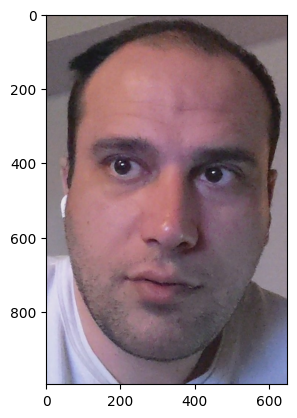

In [133]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

# Collecting Faces from  Video Analyzer

In [134]:
AVKASH_FACE_KEY = "1a2396256acf47948e521ed1c2e3b557"
AVKASH_FACE_ENDPOINT = "https://face-detection-api1.cognitiveservices.azure.com/"

In [135]:
# Create a client
face_client = FaceClient(AVKASH_FACE_ENDPOINT, CognitiveServicesCredentials(AVKASH_FACE_KEY))

In [136]:
face_client.api_version

'1.0'

https://github.com/Azure-Samples/cognitive-services-quickstart-code/blob/master/python/Face/DetectIdentifyFace.py

## Build the Person Model Using Person Images
**Note: here you need to build a person model using the person images from the previous exercise. Before moving forward, make sure you upload all the images to the workspace.**

Modify the code below as needed.

In [137]:
!ls video-analyzer-face*.jpg

video-analyzer-face1.jpg video-analyzer-face3.jpg video-analyzer-face5.jpg
video-analyzer-face2.jpg video-analyzer-face4.jpg video-analyzer-face6.jpg


In [138]:
my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer")]
print(my_face_images)

['video-analyzer-face3.jpg', 'video-analyzer-face2.jpg', 'video-analyzer-face1.jpg', 'video-analyzer-face5.jpg', 'video-analyzer-face4.jpg', 'video-analyzer-face6.jpg']


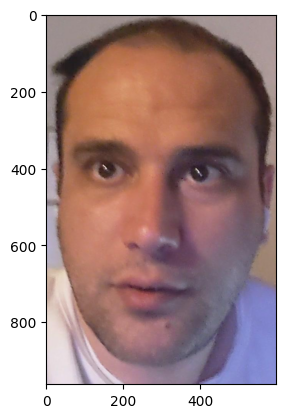

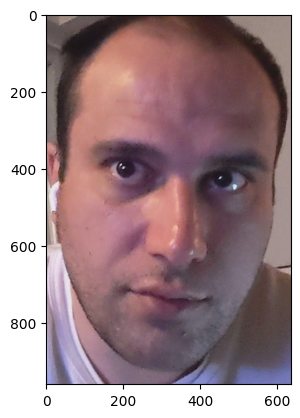

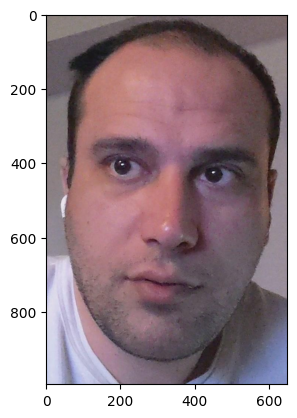

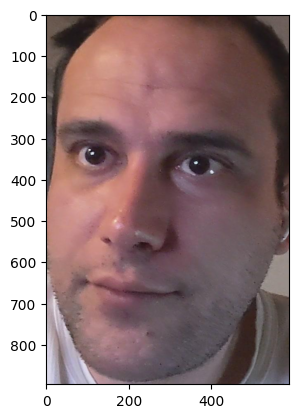

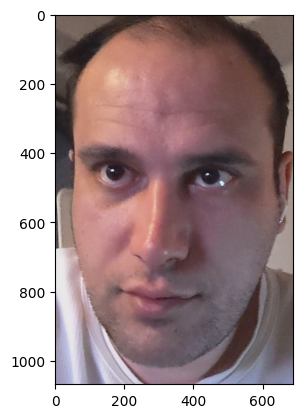

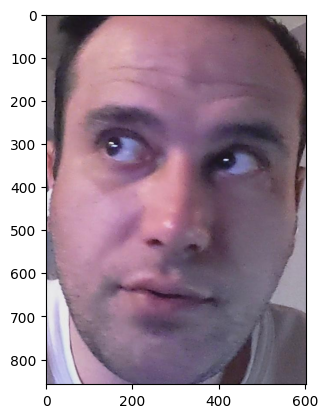

In [139]:
for img in my_face_images:
    with open(img, 'rb') as img_code:
        img_view_ready = Image.open(img_code)
        plt.figure()
        plt.imshow(img_view_ready)

In [140]:
# Note if this UUID already used earlier, you will get an error 
# Replace "person-avkash" with your own PersonModel name
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-avkash'

In [143]:
## This code is taken from Azure face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    my_face = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg images of human in working directory.
    my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer")]
    # Add images to a Person object
    for image_p in my_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, my_face.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [144]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: b30f0060-aef7-458d-83ae-75ca9a52819b
Training status: running.
Training status: succeeded.


In [145]:
# Detect all faces in query image list, then add their face IDs to a new list.
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [146]:
ids = detect_faces(face_client, my_face_images)

Detecting faces in query images list...
Opening image:  video-analyzer-face3.jpg
Face ID ec6c222b-81be-4544-8a62-348189bec00d found in image video-analyzer-face3.jpg
Opening image:  video-analyzer-face2.jpg
Face ID a2b93fc5-cfe3-4488-a785-b3f751e97802 found in image video-analyzer-face2.jpg
Opening image:  video-analyzer-face1.jpg
Face ID 0377d8ba-f2f3-48b9-b6f8-99a531d77d6b found in image video-analyzer-face1.jpg
Opening image:  video-analyzer-face5.jpg
Face ID 125cdc5a-19cb-40fc-965e-fbbdce497df8 found in image video-analyzer-face5.jpg
Opening image:  video-analyzer-face4.jpg
Face ID 290e669f-3db2-450a-bb35-bbd45d6006f9 found in image video-analyzer-face4.jpg
Opening image:  video-analyzer-face6.jpg
Face ID 887780b3-bd19-4362-9b68-865553b162b2 found in image video-analyzer-face6.jpg


In [147]:
ids

{'video-analyzer-face3.jpg': 'ec6c222b-81be-4544-8a62-348189bec00d',
 'video-analyzer-face2.jpg': 'a2b93fc5-cfe3-4488-a785-b3f751e97802',
 'video-analyzer-face1.jpg': '0377d8ba-f2f3-48b9-b6f8-99a531d77d6b',
 'video-analyzer-face5.jpg': '125cdc5a-19cb-40fc-965e-fbbdce497df8',
 'video-analyzer-face4.jpg': '290e669f-3db2-450a-bb35-bbd45d6006f9',
 'video-analyzer-face6.jpg': '887780b3-bd19-4362-9b68-865553b162b2'}

## Matching face from the person model with face from Video Analyzer 

In [148]:
## -------
## Reading file locally
## -------
dl_image = open('video-analyzer-face1.jpg', 'rb')
dl_faces = face_client.face.detect_with_stream(dl_image)

## Viewing Face ID and then saving it into the list of already saved Face IDs

In [149]:
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_image)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['sample.png'] = face.face_id

Face ID ae5cff55-e190-4e76-96ef-0949ce01ce94 found in image <_io.BufferedReader name='video-analyzer-face1.jpg'>


In [177]:
info['summarizedInsights']['sentiments']

[]

## Now, we have 4 + 1 = 5 Face IDs in our Face ID list

In [150]:
ids

{'video-analyzer-face3.jpg': 'ec6c222b-81be-4544-8a62-348189bec00d',
 'video-analyzer-face2.jpg': 'a2b93fc5-cfe3-4488-a785-b3f751e97802',
 'video-analyzer-face1.jpg': '0377d8ba-f2f3-48b9-b6f8-99a531d77d6b',
 'video-analyzer-face5.jpg': '125cdc5a-19cb-40fc-965e-fbbdce497df8',
 'video-analyzer-face4.jpg': '290e669f-3db2-450a-bb35-bbd45d6006f9',
 'video-analyzer-face6.jpg': '887780b3-bd19-4362-9b68-865553b162b2',
 'sample.png': 'ae5cff55-e190-4e76-96ef-0949ce01ce94'}

## Using the face ID from the identify card and matching the identity with the Person Group model

### Note: Please replace the face UUID

In [154]:
# Enter the face ID of ca-dl-sample.png from the output of the cell above
get_the_face_id_from_the_sample = 'ec6c222b-81be-4544-8a62-348189bec00d'

In [155]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_sample], PERSON_GROUP_ID)

In [156]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.9047


In [170]:
my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("passport")]
print(my_face_images)

['passport.jpg']


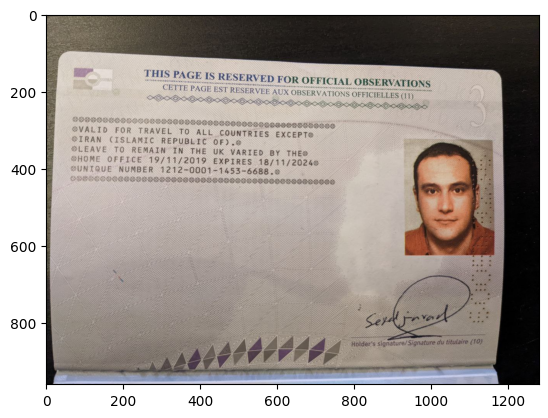

In [171]:
for img in my_face_images:
    with open(img, 'rb') as img_code:
        img_view_ready = Image.open(img_code)
        
        plt.figure()
        plt.imshow(img_view_ready)

In [172]:
ids = detect_faces(face_client, my_face_images)

Detecting faces in query images list...
Opening image:  passport.jpg
Face ID 9036a152-6551-4573-b96e-6a5b60e9b38f found in image passport.jpg


In [173]:
get_the_face_id_from_the_sample = '9036a152-6551-4573-b96e-6a5b60e9b38f'

In [174]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_sample], PERSON_GROUP_ID)

In [176]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.60929
